In [2]:
import numpy as np
import pandas as pd

# === Load the dataset ===
data = pd.read_csv("xy_data.csv")
x_obs = data["x"].to_numpy()
y_obs = data["y"].to_numpy()


/var/folders/05/7f9s_slj4hjgznkrvd4fc7wr0000gn/T/ipykernel_73447/600872059.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#           VALUES IN THE EXAMPLE

# === Parameter values from the example (now in DEGREES) ===
theta = 47.33       # degrees (previously 0.826 radians)
M = 0.0742
X = 11.5793

# === Generate t values (uniformly spaced between 6 and 60) ===
t = np.linspace(6, 60, len(x_obs))

# === Define the model functions (convert degrees -> radians inside) ===
def x_model(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)  # convert to radians for math
    return t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X

def y_model(t, theta_deg, M):
    theta = np.deg2rad(theta_deg)  # convert to radians for math
    return 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)

# === Predicted values ===
x_pred = x_model(t, theta, M, X)
y_pred = y_model(t, theta, M)

# === Compute L1 distance ===
L1 = np.sum(np.abs(x_obs - x_pred) + np.abs(y_obs - y_pred))

print(f"Theta = {theta:.3f} degrees")
print(f"L1 distance = {L1:.6f}")


Theta = 47.330 degrees
L1 distance = 96168.173333


In [ ]:
#           ITERATING EACH INDIVIUAL VARIABLE OPTIMISATION


# --- Define the parametric model (from the question) ---
def curve(t, theta, M, X):
    """Return predicted x(t), y(t) for given params."""
    x_pred = (t * np.cos(theta)
              - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta)
              + X)
    y_pred = (42
              + t * np.sin(theta)
              + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta))
    return x_pred, y_pred


# --- Define L1 Loss Function ---
def L1_loss(params):
    """
    Compute the L1 (Manhattan) distance between predicted and observed curves.
    
    Formula:
        L1 = mean( |x_pred - x_obs| + |y_pred - y_obs| )

    Lower L1 => better fit.
    """
    theta, M, X = params
    x_pred, y_pred = curve(t, theta, M, X)
    return np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))


# --- Coordinate Descent Optimization ---
def coordinate_descent(theta0, M0, X0, iters=5):
    theta, M, X = theta0, M0, X0
    loss_history = []

    for i in range(iters):
        # 1. Optimize theta
        theta_grid = np.linspace(theta - np.deg2rad(1), theta + np.deg2rad(1), 30)
        theta = min(theta_grid, key=lambda th: L1_loss((th, M, X)))

        # 2. Optimize M
        M_grid = np.linspace(M - 0.005, M + 0.005, 30)
        M = min(M_grid, key=lambda m: L1_loss((theta, m, X)))

        # 3. Optimize X
        X_grid = np.linspace(X - 2, X + 2, 30)
        X = min(X_grid, key=lambda x_: L1_loss((theta, M, x_)))

        current_loss = L1_loss((theta, M, X))
        loss_history.append(current_loss)

        print(f"Iter {i+1}: θ={np.rad2deg(theta):.3f}°, M={M:.5f}, X={X:.3f}, L1={current_loss:.6f}")

    return theta, M, X, loss_history


# --- Initial Guesses (within given range) ---
theta0 = np.deg2rad(25)  # mid of 0–50 degrees
M0 = 0.0                 # mid of -0.05–0.05
X0 = 50.0                # mid of 0–100

# --- Run the Optimization ---
theta_opt, M_opt, X_opt, loss_history = coordinate_descent(theta0, M0, X0, iters=1000)

# --- Print Results ---
print("\n--- Final Optimized Values ---")
print(f"Theta = {np.rad2deg(theta_opt):.4f} degrees")
print(f"M     = {M_opt:.6f}")
print(f"X     = {X_opt:.4f}")
print(f"Final L1 Loss = {loss_history[-1]:.6f}")


Iter 1: θ=25.793°, M=0.00500, X=52.000, L1=38117.892738
Iter 2: θ=26.517°, M=0.01000, X=54.000, L1=37930.995882
Iter 3: θ=27.448°, M=0.01500, X=54.759, L1=37880.264873
Iter 4: θ=27.759°, M=0.02000, X=54.828, L1=37868.050453
Iter 5: θ=28.000°, M=0.02086, X=54.897, L1=37865.541961
Iter 6: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 7: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 8: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 9: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 10: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 11: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 12: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 13: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 14: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 15: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 16: θ=28.103°, M=0.02138, X=54.828, L1=37865.332365
Iter 17: θ=28.138°, M=0.02155, X=54.897, L1=37865.142698
Iter 18: θ=28.103°, M=0.02138, X=54.828,

In [5]:
#           ITERATING EACH INDIVIUAL VARIABLE OPTIMISATION

t = np.linspace(6, 60, len(x_obs))

# --- Define the parametric model (from the question) ---
def curve(t, theta, M, X):
    """Return predicted x(t), y(t) for given params."""
    x_pred = (t * np.cos(theta)
              - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta)
              + X)
    y_pred = (42
              + t * np.sin(theta)
              + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta))
    return x_pred, y_pred


# --- Define L1 Loss Function ---
def L1_loss(params):
    """
    Compute the L1 (Manhattan) distance between predicted and observed curves.
    
    Formula:
        L1 = mean( |x_pred - x_obs| + |y_pred - y_obs| )

    Lower L1 => better fit.
    """
    theta, M, X = params
    x_pred, y_pred = curve(t, theta, M, X)
    return np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))


# --- Coordinate Descent Optimization ---
def coordinate_descent(theta0, M0, X0, iters=5):
    theta, M, X = theta0, M0, X0
    loss_history = []

    for i in range(iters):
        # 1. Optimize theta
        theta_grid = np.linspace(theta - np.deg2rad(1), theta + np.deg2rad(1), 30)
        theta = min(theta_grid, key=lambda th: L1_loss((th, M, X)))

        # 2. Optimize M
        M_grid = np.linspace(M - 0.005, M + 0.005, 30)
        M = min(M_grid, key=lambda m: L1_loss((theta, m, X)))

        # 3. Optimize X
        X_grid = np.linspace(X - 2, X + 2, 30)
        X = min(X_grid, key=lambda x_: L1_loss((theta, M, x_)))

        current_loss = L1_loss((theta, M, X))
        loss_history.append(current_loss)

        print(f"Iter {i+1}: θ={np.rad2deg(theta):.3f}°, M={M:.5f}, X={X:.3f}, L1={current_loss:.6f}")

    return theta, M, X, loss_history


# --- Initial Guesses (within given range) ---
theta0 = np.deg2rad(15)  # mid of 0–50 degrees
M0 = -0.025                 # mid of -0.05–0.05
X0 = 25.0                # mid of 0–100

# --- Run the Optimization ---
theta_opt, M_opt, X_opt, loss_history = coordinate_descent(theta0, M0, X0, iters=1000)

# --- Print Results ---
print("\n--- Final Optimized Values ---")
print(f"Theta = {np.rad2deg(theta_opt):.4f} degrees")
print(f"M     = {M_opt:.6f}")
print(f"X     = {X_opt:.4f}")
print(f"Final L1 Loss = {loss_history[-1]:.6f}")


Iter 1: θ=16.000°, M=-0.02000, X=27.000, L1=55065.352704
Iter 2: θ=17.000°, M=-0.01500, X=29.000, L1=52742.165775
Iter 3: θ=18.000°, M=-0.01000, X=31.000, L1=50574.351074
Iter 4: θ=19.000°, M=-0.00500, X=33.000, L1=48577.334223
Iter 5: θ=19.379°, M=0.00000, X=35.000, L1=46767.192025
Iter 6: θ=19.828°, M=0.00259, X=37.000, L1=45114.652637
Iter 7: θ=20.276°, M=-0.00241, X=39.000, L1=43637.362681
Iter 8: θ=21.276°, M=-0.00741, X=41.000, L1=42307.896940
Iter 9: θ=22.069°, M=-0.01241, X=43.000, L1=41156.373801
Iter 10: θ=22.724°, M=-0.01741, X=45.000, L1=40182.855825
Iter 11: θ=23.655°, M=-0.02241, X=47.000, L1=39390.249285
Iter 12: θ=24.448°, M=-0.02741, X=49.000, L1=38761.406112
Iter 13: θ=25.034°, M=-0.02241, X=51.000, L1=38310.254405
Iter 14: θ=25.690°, M=-0.01741, X=53.000, L1=38043.697981
Iter 15: θ=26.345°, M=-0.01241, X=54.724, L1=37965.712804
Iter 16: θ=27.069°, M=-0.00741, X=54.793, L1=37949.182016
Iter 17: θ=27.103°, M=-0.00241, X=54.862, L1=37936.941339
Iter 18: θ=27.138°, M=0.0

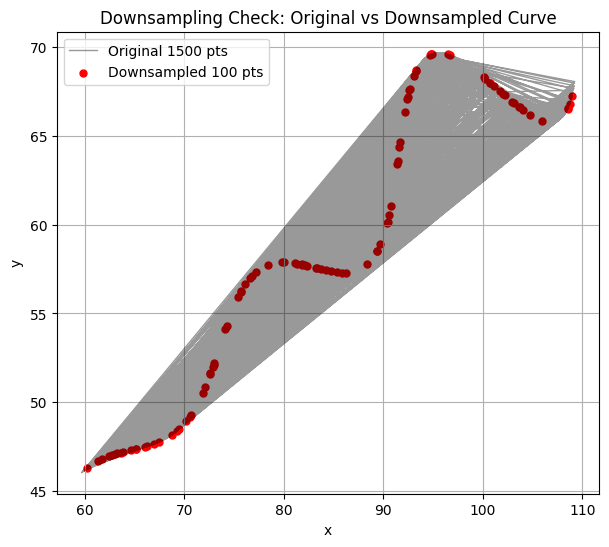


--- AI Model Predicted Parameters ---
Theta = -0.872°
M     = -0.00126
X     = 24.023


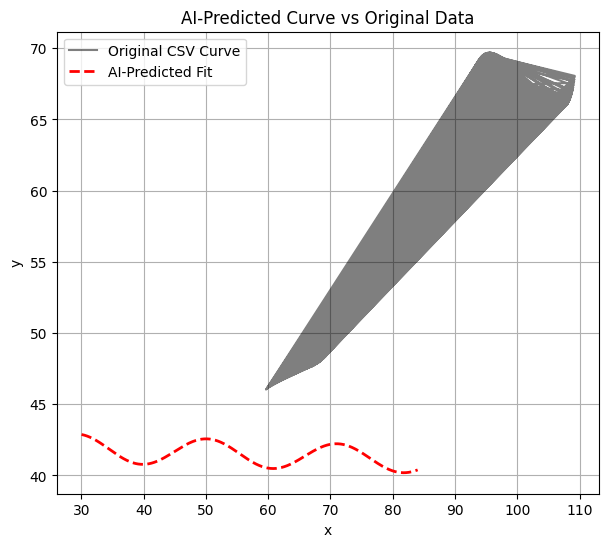

In [24]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# === Load your real CSV data ===
real_data = np.loadtxt("xy_data.csv", delimiter=",", skiprows=1)

# === Step 1: Downsample to match model input size (100 points) ===
num_points_model = 100
indices = np.linspace(0, len(real_data)-1, num_points_model, dtype=int)
real_downsampled = real_data[indices]

# === Step 2: Visualize original vs downsampled points ===
plt.figure(figsize=(7,6))
plt.plot(real_data[:,0], real_data[:,1], 'k-', linewidth=1, alpha=0.4, label="Original 1500 pts")
plt.scatter(real_downsampled[:,0], real_downsampled[:,1], c='r', s=25, label="Downsampled 100 pts")
plt.title("Downsampling Check: Original vs Downsampled Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# === Step 3: Prepare downsampled data for AI model ===
real_curve = real_downsampled.flatten()  # Flatten (x,y) pairs
real_curve_norm = (real_curve - X_mean) / X_std  # Normalize using training stats
real_tensor = torch.tensor(real_curve_norm, dtype=torch.float32).unsqueeze(0)

# === Step 4: Predict parameters using trained model ===
model.eval()
with torch.no_grad():
    predicted_params = model(real_tensor).numpy()[0]

theta_pred, M_pred, X_pred = predicted_params

# === Step 5: Display predicted values ===
print("\n--- AI Model Predicted Parameters ---")
print(f"Theta = {theta_pred:.3f}°")
print(f"M     = {M_pred:.5f}")
print(f"X     = {X_pred:.3f}")

# === Step 6: (Optional) Visualize the fitted curve using predicted params ===
def curve(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    x_pred = t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X
    y_pred = 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x_pred, y_pred

t_vals = np.linspace(6, 60, len(real_data))
x_fit, y_fit = curve(t_vals, theta_pred, M_pred, X_pred)

plt.figure(figsize=(7,6))
plt.plot(real_data[:,0], real_data[:,1], 'k-', alpha=0.5, label="Original CSV Curve")
plt.plot(x_fit, y_fit, 'r--', linewidth=2, label="AI-Predicted Fit")
plt.title("AI-Predicted Curve vs Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


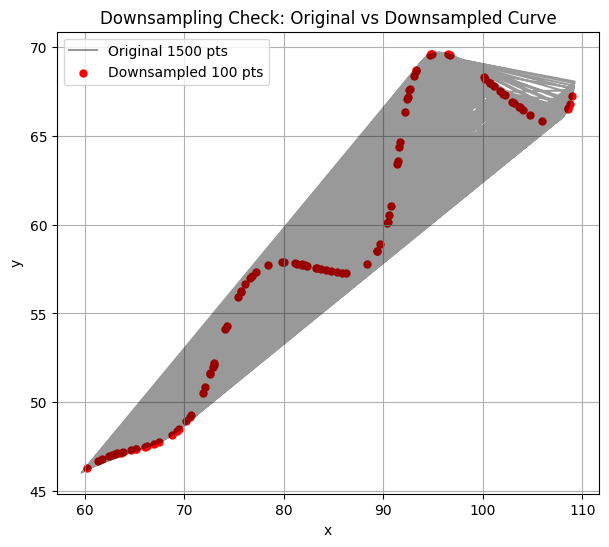


--- AI Model Predicted Parameters ---
Theta (deg) = -0.872
M           = -0.00126
X           = 24.023


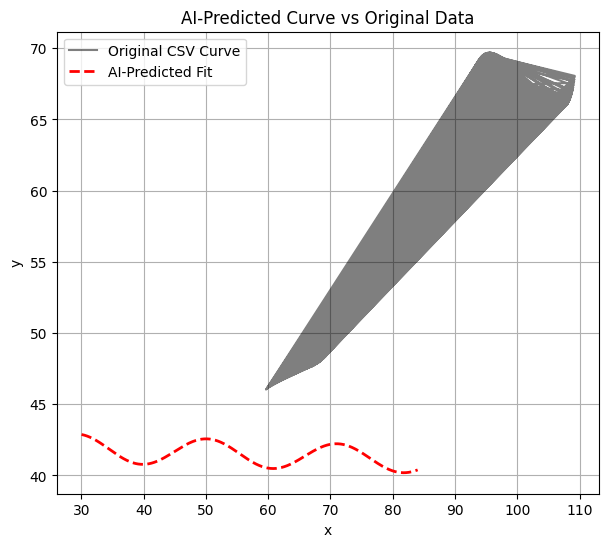

Iter 1: θ=0.128°, M=-0.00626, X=26.023, L1=65216.326197
Iter 2: θ=1.128°, M=-0.01126, X=28.023, L1=62220.911473
Iter 3: θ=2.128°, M=-0.01626, X=30.023, L1=59361.884203
Iter 4: θ=3.128°, M=-0.02126, X=32.023, L1=56646.391800
Iter 5: θ=4.128°, M=-0.02626, X=34.023, L1=54107.339802
Iter 6: θ=5.128°, M=-0.03126, X=36.023, L1=51753.093765

--- Refined (AI + L1 Optimized) Parameters ---
Theta (deg) = 5.128
M           = -0.03126
X           = 36.023


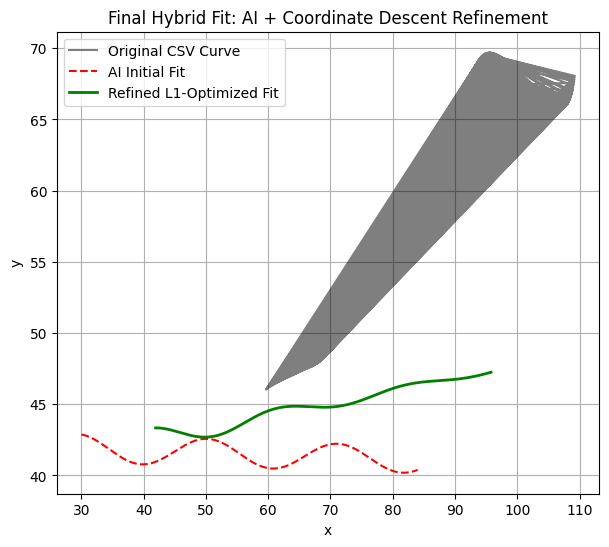


Final L1 Distance = 51753.093765


In [26]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# === Load your CSV ===
real_data = np.loadtxt("xy_data.csv", delimiter=",", skiprows=1)

# === Downsample to 100 points (match AI model input) ===
num_points_model = 100
indices = np.linspace(0, len(real_data)-1, num_points_model, dtype=int)
real_downsampled = real_data[indices]

# === Visualize original vs downsampled ===
plt.figure(figsize=(7,6))
plt.plot(real_data[:,0], real_data[:,1], 'k-', alpha=0.4, label="Original 1500 pts")
plt.scatter(real_downsampled[:,0], real_downsampled[:,1], c='r', s=25, label="Downsampled 100 pts")
plt.title("Downsampling Check: Original vs Downsampled Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# === Prepare data for AI model ===
real_curve = real_downsampled.flatten()
real_curve_norm = (real_curve - X_mean) / X_std  # use same normalization as during training
real_tensor = torch.tensor(real_curve_norm, dtype=torch.float32).unsqueeze(0)

# === Predict with trained model ===
model.eval()
with torch.no_grad():
    predicted_params = model(real_tensor).numpy()[0]

theta_pred, M_pred, X_pred = predicted_params
print("\n--- AI Model Predicted Parameters ---")
print(f"Theta (deg) = {theta_pred:.3f}")
print(f"M           = {M_pred:.5f}")
print(f"X           = {X_pred:.3f}")

# === Define curve model for plotting ===
def curve(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    x_pred = t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X
    y_pred = 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x_pred, y_pred

# === Plot AI-predicted fit ===
t_vals = np.linspace(6, 60, len(real_data))
x_ai, y_ai = curve(t_vals, theta_pred, M_pred, X_pred)

plt.figure(figsize=(7,6))
plt.plot(real_data[:,0], real_data[:,1], 'k-', alpha=0.5, label="Original CSV Curve")
plt.plot(x_ai, y_ai, 'r--', linewidth=2, label="AI-Predicted Fit")
plt.title("AI-Predicted Curve vs Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# === Coordinate Descent L1 Refinement ===
def L1_loss(params):
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)
    x_pred = t_vals*np.cos(theta) - np.exp(M*np.abs(t_vals))*np.sin(0.3*t_vals)*np.sin(theta) + X
    y_pred = 42 + t_vals*np.sin(theta) + np.exp(M*np.abs(t_vals))*np.sin(0.3*t_vals)*np.cos(theta)
    return np.sum(np.abs(x_pred - real_data[:,0]) + np.abs(y_pred - real_data[:,1]))

def coordinate_descent(theta0, M0, X0, iters=6):
    theta, M, X = theta0, M0, X0
    for i in range(iters):
        theta_grid = np.linspace(theta-1, theta+1, 40)   # degrees
        theta = min(theta_grid, key=lambda th: L1_loss((th, M, X)))

        M_grid = np.linspace(M-0.005, M+0.005, 40)
        M = min(M_grid, key=lambda m: L1_loss((theta, m, X)))

        X_grid = np.linspace(X-2, X+2, 40)
        X = min(X_grid, key=lambda x_: L1_loss((theta, M, x_)))

        print(f"Iter {i+1}: θ={theta:.3f}°, M={M:.5f}, X={X:.3f}, L1={L1_loss((theta,M,X)):.6f}")
    return theta, M, X

# === Run refinement starting from AI’s predicted params ===
theta_refined, M_refined, X_refined = coordinate_descent(theta_pred, M_pred, X_pred, iters=6)

print("\n--- Refined (AI + L1 Optimized) Parameters ---")
print(f"Theta (deg) = {theta_refined:.3f}")
print(f"M           = {M_refined:.5f}")
print(f"X           = {X_refined:.3f}")

# === Plot final refined fit ===
x_ref, y_ref = curve(t_vals, theta_refined, M_refined, X_refined)

plt.figure(figsize=(7,6))
plt.plot(real_data[:,0], real_data[:,1], 'k-', alpha=0.5, label="Original CSV Curve")
plt.plot(x_ai, y_ai, 'r--', linewidth=1.5, label="AI Initial Fit")
plt.plot(x_ref, y_ref, 'g-', linewidth=2, label="Refined L1-Optimized Fit")
plt.title("Final Hybrid Fit: AI + Coordinate Descent Refinement")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# === Compute final L1 ===
final_L1 = L1_loss((theta_refined, M_refined, X_refined))
print(f"\nFinal L1 Distance = {final_L1:.6f}")
